# Assignment 5 - Breast Cancer Detection
## Nourhan El Zarif

## Read Data

In [1]:
import pandas as pd
import numpy as np

col = ['id_number', 'Class', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitosis']
file = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/WI_Breast_Cancer.csv'

data = pd.read_csv(file, names = col)

#remove the stray string
data['Mitosis'] = data['Mitosis'].replace('3) <-----Reappears in Group 8 as:', np.nan)
data = data.dropna(axis = 0)
data['Mitosis'] = data['Mitosis'].astype('float64')

#seperate the target from the features
y = pd.Series(data['Class'])
data.drop(columns = ['Class', 'id_number'], inplace = True)
#Map benign to 0, malignant to 1
y = y.map({'2':0, '4':1})

In [2]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [3]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [4]:
y.value_counts()

0    458
1    242
Name: Class, dtype: int64

Value counts show class imbalance.

### Train / Test Split
The data will be split into train and test datasets.

In [5]:
np.random.seed(100)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.1, random_state=1)

# Entropy vs. Gini Coefficient
Two decision trees are created. One uses entropy for the criterion, the other uses gini coefficent. 

In [7]:
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)
entropy_pred = model_entropy.predict(x_test)

model_gini = DecisionTreeClassifier(min_samples_leaf = 4).fit(x_train, y_train)
gini_pred = model_gini.predict(x_test)

## Visualizing the Models

In [8]:
columns = list(data)

In [9]:
from sklearn import tree

dotfile1 = open("cancer_ent.dot", 'w')
tree.export_graphviz(model_entropy, out_file = dotfile1, filled = True, rounded = True, feature_names = columns)
dotfile1.close()

dotfile2 = open("cancer_gini.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile2, filled = True, rounded = True, feature_names = columns)
dotfile2.close()



from subprocess import check_call
check_call(['dot','-Tpng','cancer_ent.dot','-o','cancer_ent.png'])
check_call(['dot','-Tpng','cancer_gini.dot','-o','cancer_gini.png'])

0

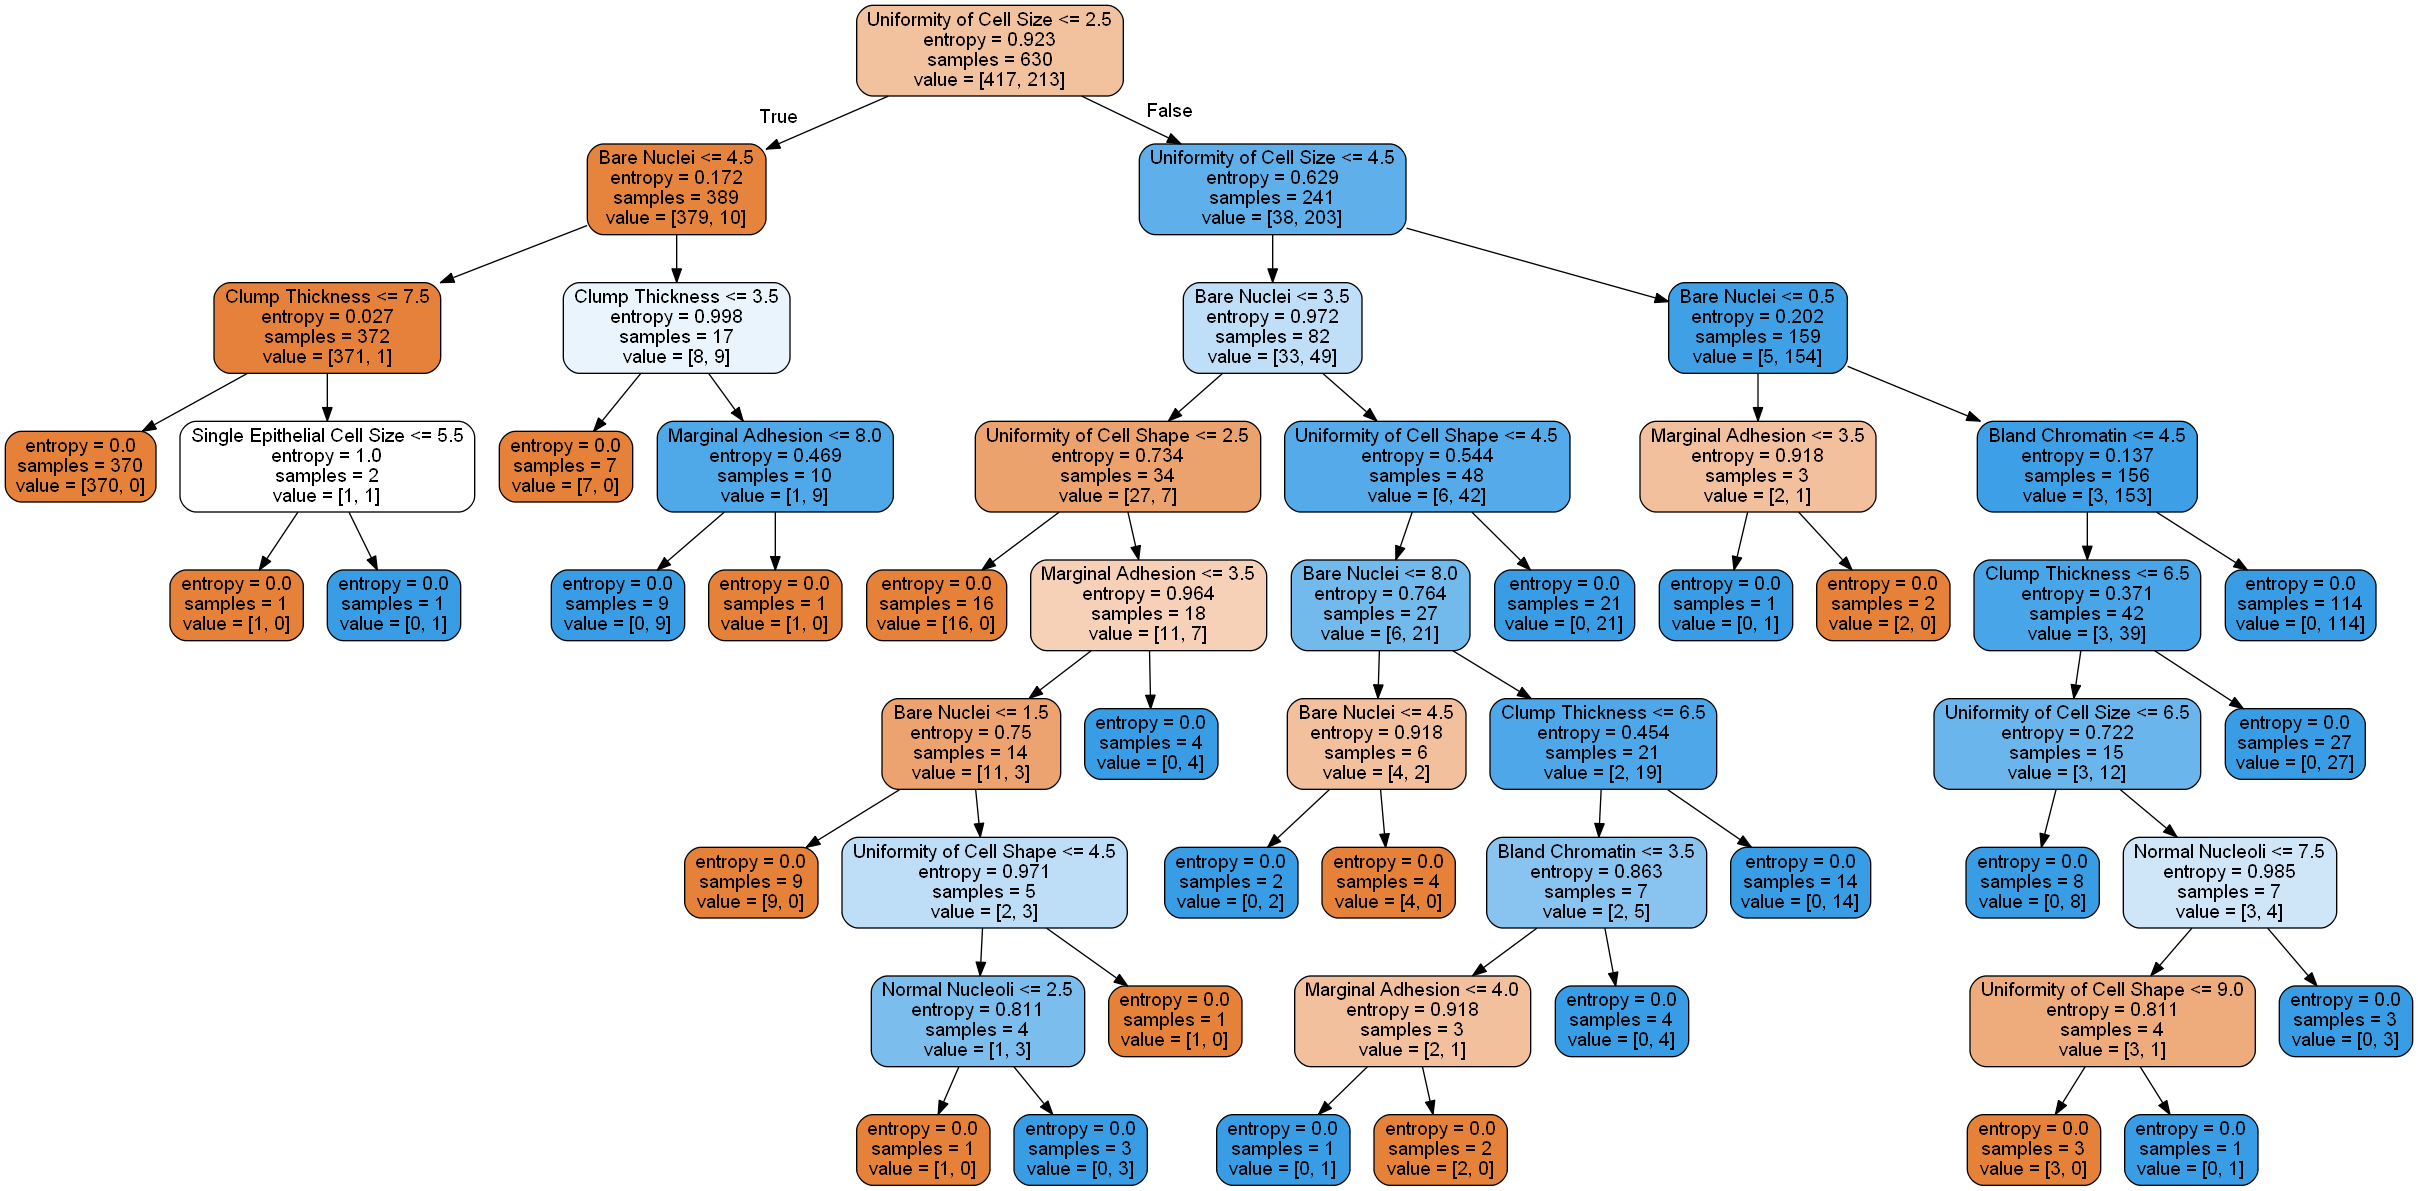

In [10]:
from IPython.display import Image
Image(filename='cancer_ent.png', width = 1000, height = 1000)

Both decision trees show the top indicator is Uniformity of cell size being less than or equal to 2.5

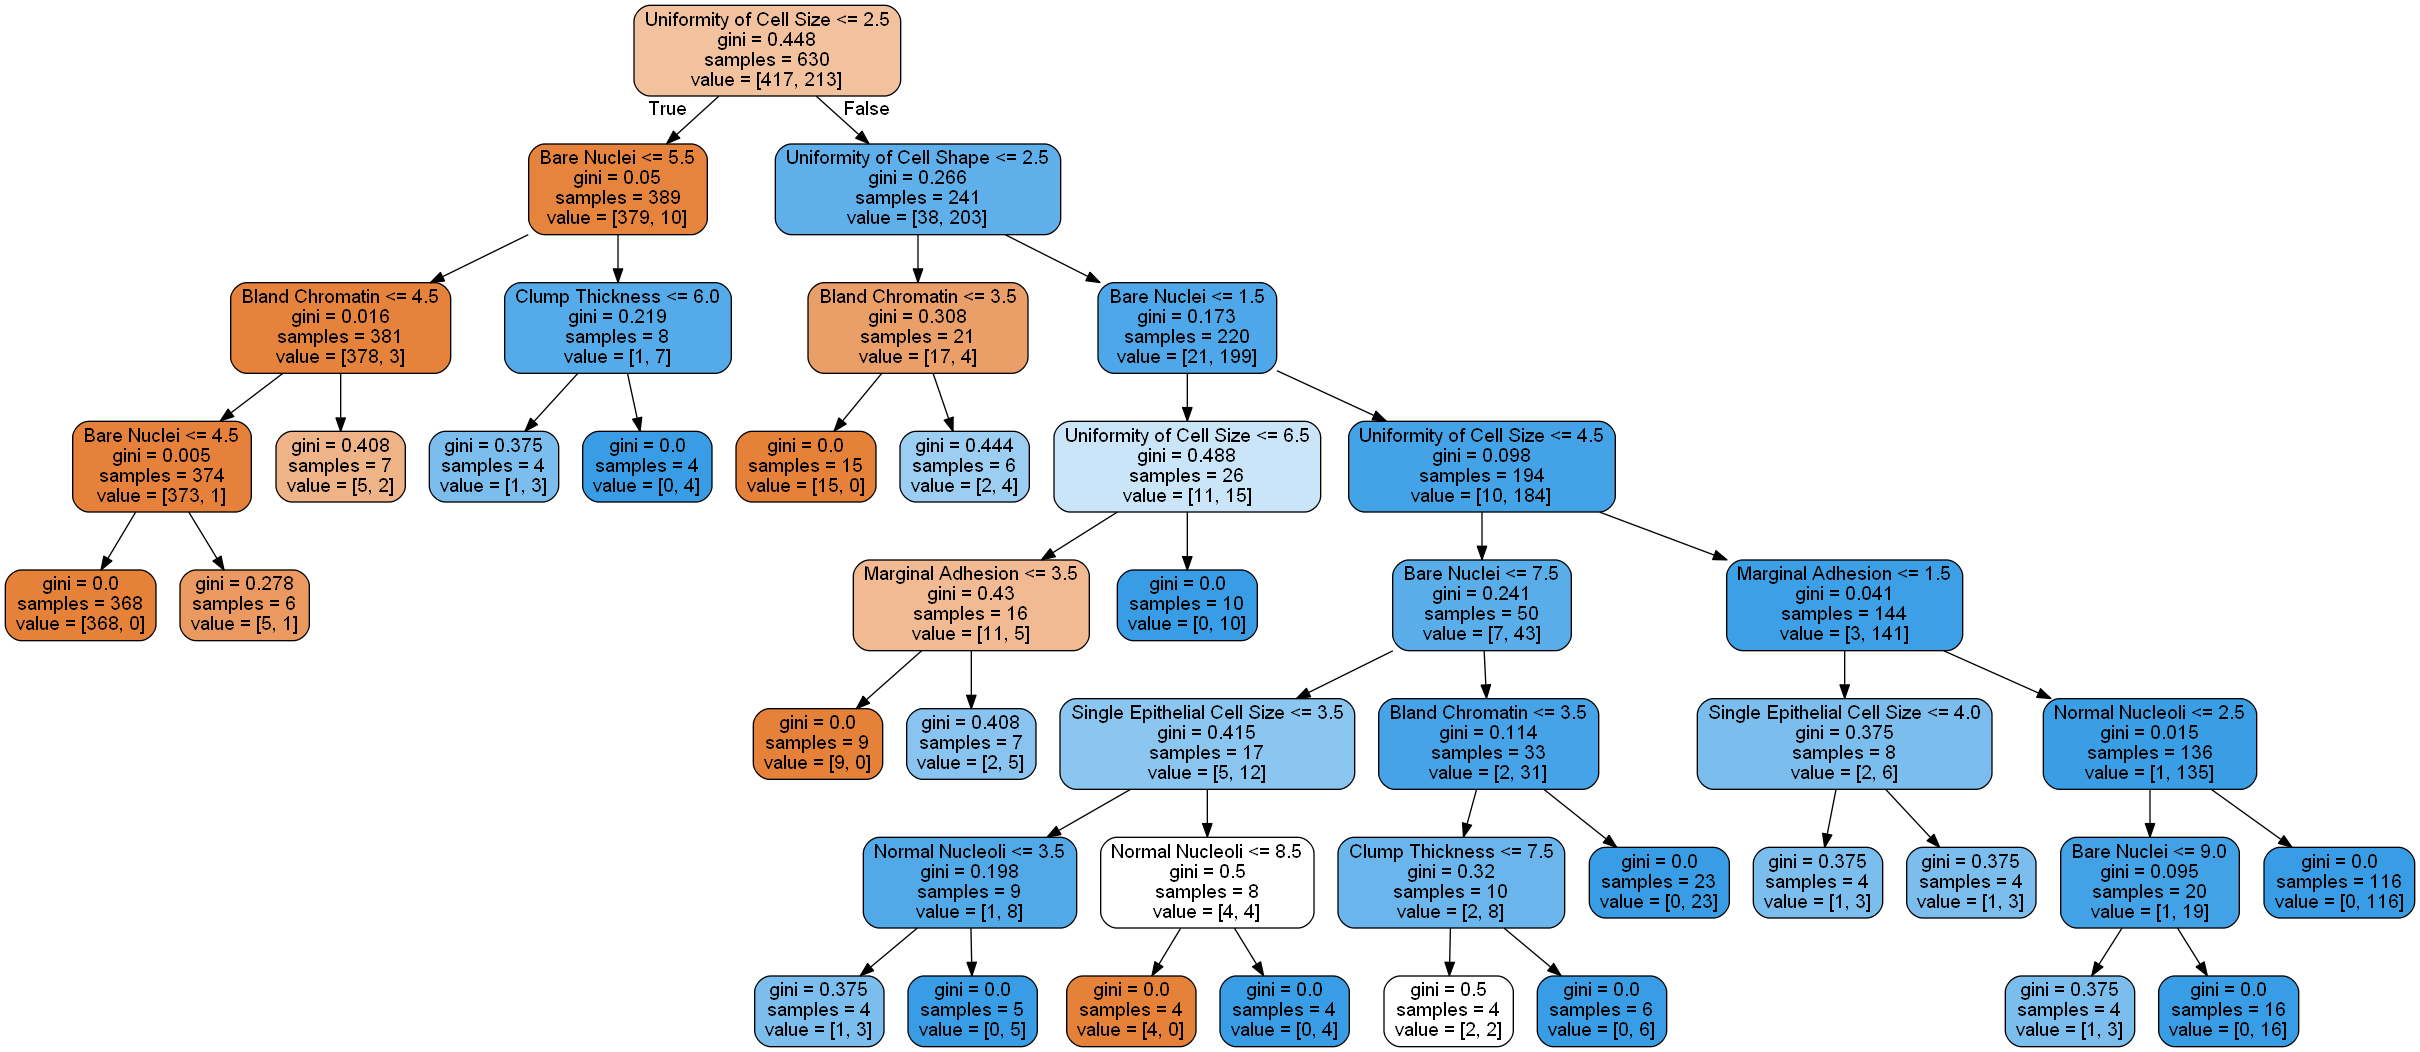

In [11]:
Image(filename='cancer_gini.png', width = 1000, height = 1000)

In [12]:
#import os
#os.system("dot -Tpng cancer_ent.dot -o cancer_ent.png")
#os.system("dot -Tpng cancer_gini.dot -o cancer_gini.png")

## Area Under the Curve (AUC) 

In [13]:
from sklearn.metrics import *
from matplotlib import pyplot as plt
import matplotlib

#function for creating and plotting ROC curve
def createROC(data, probabilities, title):
    fpr, tpr, th = roc_curve(data, probabilities)
    AUC = auc(fpr, tpr)
    
    plt.rcParams["figure.figsize"] = [8, 8] # Square
    font = {'family' : 'normal', 'weight' : 'bold', 'size' : 18}
    matplotlib.rc('font', **font)
    plt.figure()
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
    plt.legend(loc="lower right")
    plt.show()
    
    print('True Positive Rate: ' + str(tpr))
    print('False Positive Rate: ' + str(fpr))

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


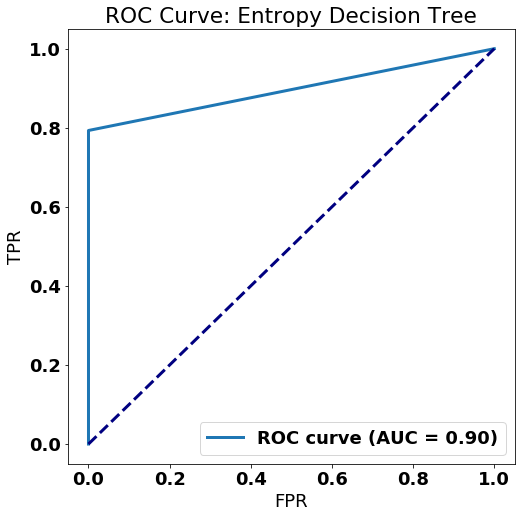

True Positive Rate: [0.         0.79310345 1.        ]
False Positive Rate: [0. 0. 1.]


In [14]:
#Creating entropy ROC curve
prob_ent = model_entropy.predict_proba(x_test)
createROC(y_test, prob_ent[:,1], 'ROC Curve: Entropy Decision Tree')

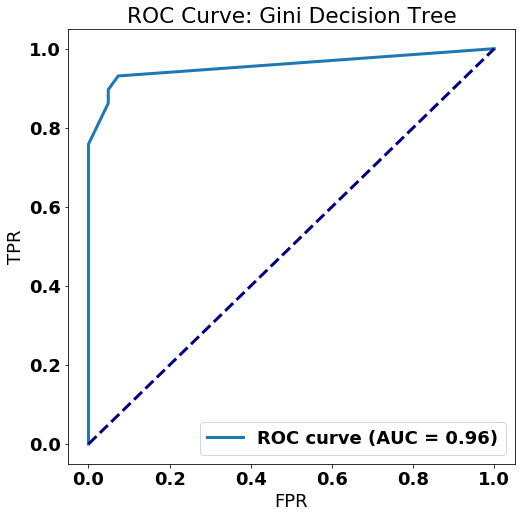

True Positive Rate: [0.         0.75862069 0.86206897 0.89655172 0.93103448 1.        ]
False Positive Rate: [0.         0.         0.04878049 0.04878049 0.07317073 1.        ]


In [15]:
#Creating gini ROC curve
prob_gini = model_gini.predict_proba(x_test)
createROC(y_test, prob_gini[:,1], 'ROC Curve: Gini Decision Tree')

## Metrics

In [16]:
#using libraries to collect model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, entropy_pred)*100))
print("Entropy precision is : {}%".format(precision_score(y_test, entropy_pred)*100))
print("Entropy recall is : {}%".format(recall_score(y_test, entropy_pred)*100))
print()
print("Gini accuracy is : {}%".format(accuracy_score(y_test, gini_pred)*100))
print("Gini precision is : {}%".format(precision_score(y_test, gini_pred)*100))
print("Gini recall is : {}%".format(recall_score(y_test, gini_pred)*100))

Entropy accuracy is : 91.42857142857143%
Entropy precision is : 100.0%
Entropy recall is : 79.3103448275862%

Gini accuracy is : 92.85714285714286%
Gini precision is : 92.85714285714286%
Gini recall is : 89.65517241379311%


In [17]:
#entropy confusion matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, entropy_pred),
    columns = ['Predicted Benign', 'Predicted Malignant'],
    index = ['True Benign', 'True Malignant']
)

,Predicted Benign,Predicted Malignant
True Benign,41,0
True Malignant,6,23


In [18]:
#Gini confusion matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, gini_pred),
    columns = ['Predicted Benign', 'Predicted Malignant'],
    index = ['True Benign', 'True Malignant']
)

,Predicted Benign,Predicted Malignant
True Benign,39,2
True Malignant,3,26


In [19]:
#value counts of test dataset
y_test.value_counts()

0    41
1    29
Name: Class, dtype: int64

### 1. Test both entropy and the gini coefficient. Which performs better and why?
The gini model performed better than the entropy model based on accuracy. The accuracy of the entropy model is 91.4%. The accuracy of the gini model is 92.9%. 

### 2. What are the best hyperparameter settings for both?
The best hyperparameter for the entropy model is the default. The best hyperparameter for the gini model is minimum samples per leaf of 4. 

### 3 . Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?
Both decision trees show the top indicator is Uniformity of cell size being less than or equal to 2.5.  The second feature is Bare Nuclei. But it starts to differ at the cutoff range. For entropy, the value is 4.5. For gini the value is 5.5. 

### 4. Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?
The entropy decision tree returned an ROC curve with an AUC of 0.90. The gini decision tree returned an ROC curve with an AUC of 0.96. The axes of the ROC curve are True Positive Rate and False Positive Rate. These are great indicator when there is a class imbalance. This data set has 65% benign cases, and 35% malignant cases. Based on  the AUC, the gini model is better. 

Precision is the propotion of the data points the model says was relevant actually were relevant. This translates to 'Of the cases classified as malignant, how many were actually malignant?'. The precision of the entropy model is 100%, while the precision of the gini model is 92.9%. This might mislead someone into thinking the entropy model did better. The entropy model only identified 23 malignant cases, and all were truely malignant. The gini model identified 28 malignant cases, but only 26 were truely malignant. That is still 3 more cases identified. 

Recall is the ability of the model to find relevant cases within a dataset. In the case of breast cancer detection, it translates to 'how many of the 29 malignant cases were identified?'. The recall of the entropy model 79.3%, while the entropy of the gini model is 89.7%. 

In this case, we should maximize recall, making the gini model more desireable.

### 5. What are the implications of using this type of machine learning algorithm for breast cancer analysis?
The implications are very high risk. This is why it is better to have a model that predicts more malignancy, rather than under predict malignancy. A missed diagnosis of malignancy can lead to the cancer going untreated, potentially getting much worse. A false positive can be ruled out under more scrutiny. This reinforces the importance of recall over precision. 